In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load data
train_df = pd.read_csv('E:/Vehicle/train_df.csv')
test_df = pd.read_csv('E:/Vehicle/test_df.csv')

In [3]:
# Handle truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
# Create ImageDataGenerators
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    rescale=1./255
)

In [5]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 476 validated image filenames belonging to 5 classes.
Found 119 validated image filenames belonging to 5 classes.
Found 149 validated image filenames belonging to 5 classes.


In [6]:
# Load pre-trained InceptionV3 model
pretrained_model = tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# Create the new model
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(train_images, validation_data=val_images, epochs=30)


Epoch 1/30


C:\Users\anand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.2169 - loss: 1.7637 - val_accuracy: 0.3361 - val_loss: 1.5033
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.4076 - loss: 1.3995 - val_accuracy: 0.4454 - val_loss: 1.2767
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.4828 - loss: 1.2106 - val_accuracy: 0.4622 - val_loss: 1.3303
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.5274 - loss: 1.1555 - val_accuracy: 0.4958 - val_loss: 1.2039
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.6023 - loss: 1.0116 - val_accuracy: 0.3782 - val_loss: 1.3968
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.5581 - loss: 1.0655 - val_accuracy: 0.4034 - val_loss: 1.3809
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.5639 - loss: 1.0094 - val_accuracy: 0.5546 - val_loss: 1.2315
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.6454 - loss: 0.9239 - val_accuracy: 0.5126 - val_loss: 1.2632
Ep

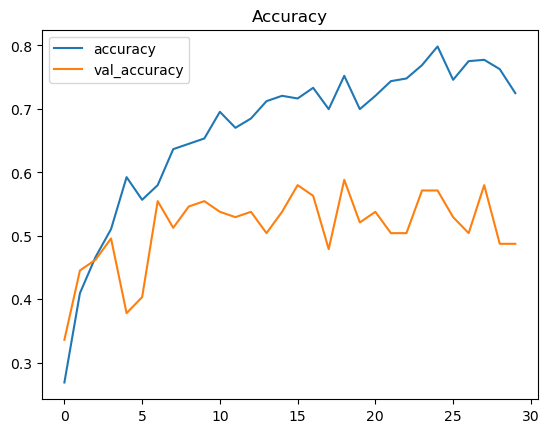

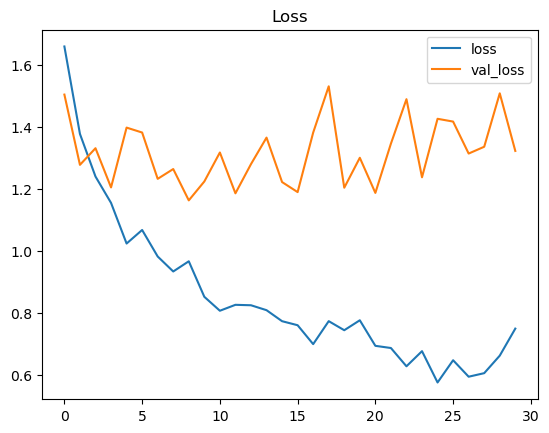

In [8]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [9]:
# Save model and history
model.save('E:/Vehicle/model/inceptionv3_model.h5')
pd.DataFrame(history.history).to_csv('E:/Vehicle/results/inceptionv3_history.csv')

# Evaluate model
results = model.evaluate(test_images, verbose=0)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1] * 100, "%")

C:\Users\anand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 1.1301549673080444
Test Accuracy: 53.02013158798218 %
